<a href="https://colab.research.google.com/github/moomonkey/tf_lab/blob/master/Fashion_mnist_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Denna kod är baserad på dokumentation i tensorflow, https://www.tensorflow.org/tutorials/keras/basic_classification, Margaret Maynard-Reids https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a, och Keras dokumentation, https://keras.io/examples/mnist_cnn/. Visualisering är inkluderad för att verifiera koden.
# Import the fashion database

In [0]:
# Importerade bibliotek

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Importera dataset Fashion-mnist, vilket har 10 kategorier, i träningsdata, träningslabel för att träna modellen, testdata och testlabels för att testa modellen

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Se datasetet som består av 60000 exempel i 28x28 pixelformat

In [164]:
print("Träningsbilder: ", train_img.shape, "Träningsetiketter: ", train_labels.shape)

Träningsbilder:  (60000, 28, 28) Träningsetiketter:  (60000,)


# Se testdatan, vilket består av 10000 exempel

In [165]:
print("Testbilder: ", test_img.shape, "Testetiketter: ", test_labels.shape)

Testbilder:  (10000, 28, 28) Testetiketter:  (10000,)


# Se första bilden i datasetet och pixelvärdet

AxesImage(54,36;267.84x217.44) <matplotlib.colorbar.Colorbar object at 0x7fc34c1bc6d8>


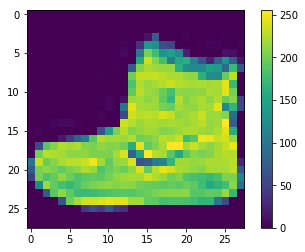

In [166]:
print(plt.imshow(train_img[0]), plt.colorbar())

# Normalisera pixleldimension från 0-255 till 0-1

AxesImage(54,36;267.84x217.44) <matplotlib.colorbar.Colorbar object at 0x7fc34bdc3198>


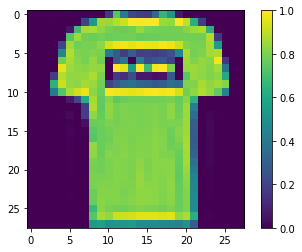

In [167]:
train_img = train_img / 255
train_labels = train_labels / 255
print(plt.imshow(train_img[1]), plt.colorbar())

# Skapa etiketter för datasetets kategorier

In [0]:
fashion_cat = ['T-shirt', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Boot']

In [169]:
print("Label: ", fashion_cat.index('T-shirt'), ":", fashion_cat[0])

Label:  0 : T-shirt


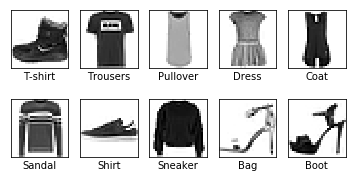

In [170]:
plt.figure(figsize=(6,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap=plt.cm.binary)
    plt.xlabel(fashion_cat[i])
plt.show()

# Definiera lager i modell

In [200]:
model = keras.Sequential([

  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# Kompilera modellen

In [0]:
#stochastic gradient decent
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training model med epoch (iteration)

In [202]:
model.fit(train_img, train_labels, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0026 - acc: 0.0999
Epoch 2/100
60000/60000 [==============================] - 4s 74us/sample - loss: 6.2380e-07 - acc: 0.1000
Epoch 3/100
60000/60000 [==============================] - 4s 75us/sample - loss: 1.4319e-07 - acc: 0.1000
Epoch 4/100
60000/60000 [==============================] - 4s 73us/sample - loss: 5.0349e-08 - acc: 0.1000
Epoch 5/100
60000/60000 [==============================] - 4s 73us/sample - loss: 2.1460e-08 - acc: 0.1000
Epoch 6/100
60000/60000 [==============================] - 4s 73us/sample - loss: 9.3429e-09 - acc: 0.1000
Epoch 7/100
60000/60000 [==============================] - 4s 74us/sample - loss: 4.0490e-09 - acc: 0.1000
Epoch 8/100
60000/60000 [==============================] - 5s 79us/sample - loss: 1.8497e-09 - acc: 0.1000
Epoch 9/100
60000/60000 [==============================] - 5s 79us/sample - loss: 9.4969e-10 - acc: 0.1000
Epoch 10/100
60000/60000 [===============

# Evaluera noggrannhet

In [206]:
train_loss, train_acc = model.evaluate(train_img, train_labels)
print('\nTest nogrannhet: ', train_acc, '\nTest loss', train_loss)

60000/60000 [==============================] - 2s 38us/sample - loss: 1.4267 - acc: 1.6667e-05

Test nogrannhet:  1.6666667e-05 
Test loss 1.4267186539332073


# Använd test data på modellen för att jämföra med träningsdata

In [204]:
model.fit(test_img, test_labels, epochs=100)

Epoch 1/100
10000/10000 [==============================] - 1s 75us/sample - loss: 591.0642 - acc: 0.6593
Epoch 2/100
10000/10000 [==============================] - 1s 74us/sample - loss: 10.2355 - acc: 0.7588
Epoch 3/100
10000/10000 [==============================] - 1s 78us/sample - loss: 8.0576 - acc: 0.7729
Epoch 4/100
10000/10000 [==============================] - 1s 73us/sample - loss: 6.1591 - acc: 0.7866
Epoch 5/100
10000/10000 [==============================] - 1s 74us/sample - loss: 5.3485 - acc: 0.7902
Epoch 6/100
10000/10000 [==============================] - 1s 73us/sample - loss: 4.6100 - acc: 0.7978
Epoch 7/100
10000/10000 [==============================] - 1s 74us/sample - loss: 4.2743 - acc: 0.7980
Epoch 8/100
10000/10000 [==============================] - 1s 72us/sample - loss: 3.4218 - acc: 0.8157
Epoch 9/100
10000/10000 [==============================] - 1s 73us/sample - loss: 3.5384 - acc: 0.8111
Epoch 10/100
10000/10000 [==============================] - 1s 72us/sa

#Evaluera test data

In [207]:
test_loss, test_acc = model.evaluate(test_img, test_labels)
print('\nTest nogrannhet: ', test_acc, '\nTest loss', test_loss)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.3473 - acc: 0.8709

Test nogrannhet:  0.8709 
Test loss 0.34729752514362333


# Resultat av evaluering: Bäst testresultat av klassificering

In [0]:
predictions = model.predict(test_img)

In [227]:
print("Etikett_nummer: ",np.argmax(predictions[0]), '\n'"Katergori: ", fashion_cat[np.argmax(predictions[0])])

Etikett_nummer:  7 
Katergori:  Sneaker
